## Итоговая работа

## Группа: РИМ-111060

## Подгруппа задания (вариант): 3

### ФИО студентов:
#### Степаненко Дмитрий Владимирович
#### Лисовский Кирилл Алексеевич
#### Уксусников Николай Алексеевич

## 1. Сначала импортируйте в свой код нужные библиотеки, функции и т.д. Кроме того, произвести установки необходимых пакетов:


In [58]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import skew, kurtosis, stats
from statsmodels.tsa import api as tsa
import h5py
import pywt
%matplotlib inline

import pandas as pd
from scipy import signal
from scipy.optimize import curve_fit

## 2. Отобразите ваш ВР и дайте визуальную оценку:

ВР состоит из 5113 значений
Значения временного ряда: 
[208 241 274 ... 237 229 218]


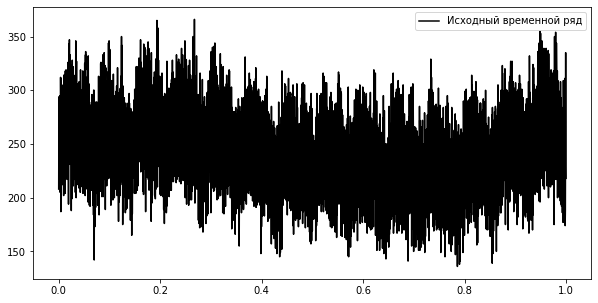

In [59]:
# сначала перевели из .txt в .npy

load_data = np.load('Data_3.npy')
Fort = np.array(load_data)
print('ВР состоит из', len(Fort), 'значений')
print('Значения временного ряда: ')
print(Fort)
t = np.linspace(0,1,len(Fort))
plt.figure(figsize = (10, 5))
plt.plot(t, Fort, 'k', label='Исходный временной ряд')
plt.legend()
plt.show()

#### Наблюдаются периодические составляющие ВР.

## 3. Оцените мат. ожидание, дисперсию данных. Оцените АКФ.

Мат. ожидание:  250.80226872677488
Дисперсия:  1751.8809101667846
Асимметрия ВР:  -0.27712361833315924
Эксцесс ВР:  2.41870380121501


<function matplotlib.pyplot.show(close=None, block=None)>

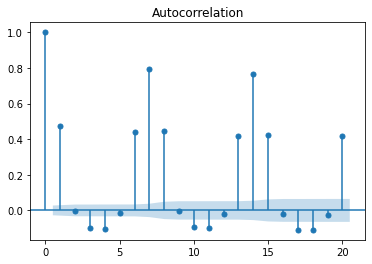

In [60]:
print('Мат. ожидание: ', np.mean(Fort))
print('Дисперсия: ', np.var(Fort))
print('Асимметрия ВР: ', skew(Fort))
print('Эксцесс ВР: ', kurtosis(Fort, fisher=False))
plot_acf(Fort, lags=20)
plt.show

### Таким образом, анализируя эти характеристики, с учетом всех рассмотренных свойств функции автокорреляции, можно выявлять структуру исследуемого ВР в соответствие с аддитивной моделью, то есть наличие в нем тренда, сезонных составляющих и периодических составляющих.

## 4. Оцените стационарность временного ряда KPSS-тестом. Сделайте вывод о стационарности.

In [61]:
print(tsa.kpss(Fort)) # KPSS-test на стационарность

(3.7909355774448708, 0.01, 33, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Users\dusta\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\dusta\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


### Если значение p-value меньше 0.05, то нулевая гипотеза отклоняется. Если значение больше 0.05, то нулевая гипотеза принимается. Наш показатель p-value равен 0,01 - значит нулевая теория отклоняется. Временной ряд не является стационарным.

## 5. Постройте периодограмму и спектрограмму выбранного ряда. Если в данных заметен четкий период – найдите и укажите его численно.

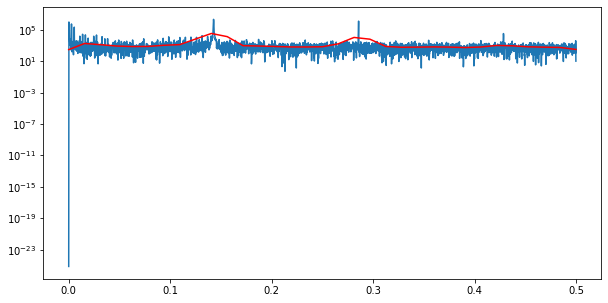

In [62]:
# строим периодограмму ВР
pd1, pdden1 = signal.periodogram(Fort) 
pdw1, pddenw1 = signal.welch(Fort, nperseg = 64)
plt.figure(figsize = (10, 5))
plt.semilogy(pd1, pdden1)
plt.semilogy(pdw1, pddenw1,'r')
plt.show()

### Наблюдаются две периодические составляющие ВР.

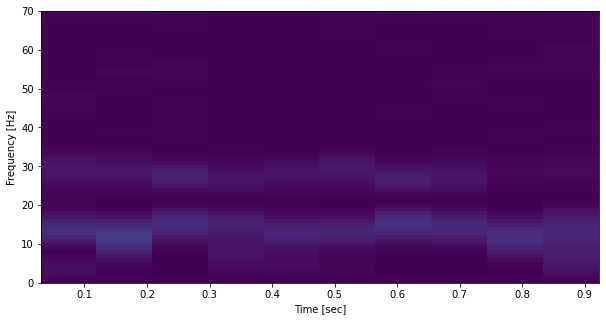

In [63]:
# Построим спектрограмму ВР
fs = 1/(t[1]-t[0]) # fs = 1/dt = N/T
f, tx, Sxx = signal.spectrogram(Fort, fs, nperseg = 768, noverlap = 312, nfft=5113)
plt.figure(figsize = (10, 5))
plt.pcolormesh(tx, f, Sxx, shading='auto') # цвет – интенсивность спектрограммы
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 70) 
plt.xlabel('Time [sec]')
plt.show()

### Имеются одна ВЧ и одна НЧ составляющие ВР.

## 6. Постройте наиболее подходящий тренд для данных.

### Модель тренда первой степени:

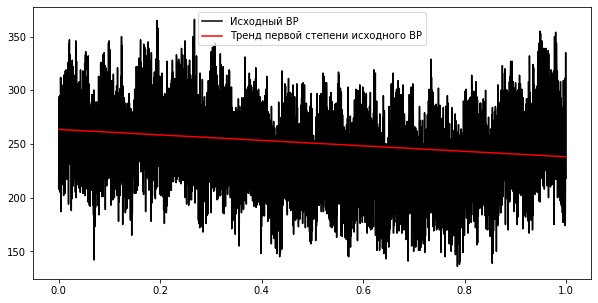

263.5306038171659
-25.456670180782094


In [64]:
bb = np.polyfit(t,Fort,1) # полиномиальная кривая первого порядка
plt.figure(figsize=(10,5))
plt.plot(t,Fort,'k',label='Исходный ВР')
plt.plot(t,bb[1]+bb[0]*t,'r',label='Тренд первой степени исходного ВР')
plt.legend()
plt.show()

print(bb[1])
print(bb[0])

## 7. Постройте прогноз этого тренда с помощью методов регрессии. Не забывайте строить доверительные интервалы!

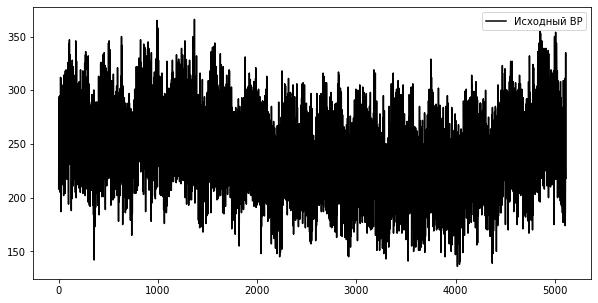

In [65]:
pr = 500 # количество прогнозируемых точек
    
t=np.arange(0, len(Fort)+pr, 1) # временная шкала для регрессии
t=t.reshape(-1,1)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k', label='Исходный ВР') # исходный ВР
plt.legend()
plt.show()

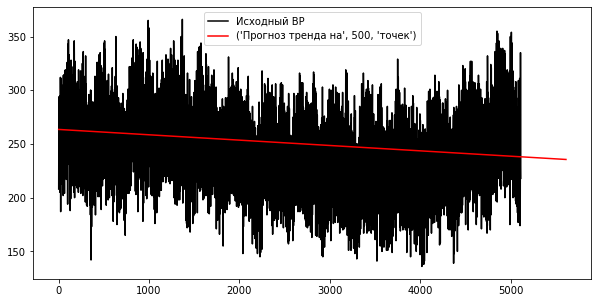

263.53060381716574
-0.004979786811577005


In [66]:
t=np.arange(0, len(Fort), 1) # диапазон урезанного ряда
t=t.reshape(-1,1)
t0=np.arange(0, len(Fort)+pr, 1) # диапазон полного ряда
t0=t0.reshape(-1,1)

bb = np.polyfit(t.reshape(1,-1)[0], Fort.reshape(1,-1)[0], 1) 
plt.figure(figsize = (10, 5))
plt.plot(t, Fort, 'k', label='Исходный ВР')
plt.plot(t0, bb[1]+bb[0]*t0, 'r',label=('Прогноз тренда на',pr,'точек')) # полином на прогнозной временной сетке
plt.legend()
plt.show()

print(bb[1])
print(bb[0])

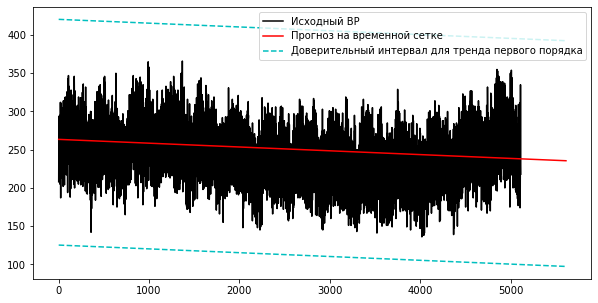

In [67]:
ordered = np.sort(Fort) # сортировка ВР 
alpha = 0.95

lower = np.percentile(ordered, (1-alpha)/2)
upper = np.percentile(ordered, alpha+((1-alpha)/2))

bb = np.polyfit(t.reshape(1,-1)[0], Fort.reshape(1,-1)[0], 1) 
plt.figure(figsize = (10, 5))
plt.plot(t, Fort, 'k', label='Исходный ВР')
plt.plot(t0, bb[1]+bb[0]*t0, 'r', label='Прогноз на временной сетке') # полином на прогнозной временной сетке

plt.plot(t0, bb[1]+bb[0]*t0+upper, 'c--',label='Доверительный интервал для тренда первого порядка')
plt.plot(t0, bb[1]+bb[0]*t0-lower, 'c--')
plt.legend()

plt.show()

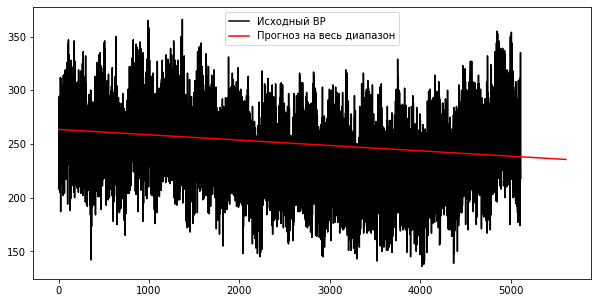

In [68]:
t=np.arange(0, len(Fort), 1) # диапазон урезанного ряда
t=t.reshape(-1,1)
t0=np.arange(0, len(Fort)+pr, 1) # диапазон полного ряда
t0=t0.reshape(-1,1)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(t, Fort) # модель регрессии
plt.figure(figsize = (10, 5))
plt.plot(t, Fort, 'k', label='Исходный ВР')
plt.plot(t0, reg.predict(t0), 'r', label='Прогноз на весь диапазон') # прогноз на весь диапазон
plt.legend()
plt.show()

## 8. Постройте прогноз данных с помощью ARIMA модели.

In [69]:
from statsmodels.tsa import api as tsa
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARIMA

C:\Users\dusta\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 5113
Model:                     ARMA(1, 0)   Log Likelihood              -26468.184
Method:                       css-mle   S.D. of innovations             42.835
Date:                Tue, 31 May 2022   AIC                          52940.367
Time:                        00:46:33   BIC                          52953.446
Sample:                             0   HQIC                         52944.946
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9857      0.002    421.120      0.000       0.981       0.990
                                    Roots                                    
                  Real          Imaginary           M

C:\Users\dusta\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 5113
Model:                     ARMA(3, 0)   Log Likelihood              -26112.271
Method:                       css-mle   S.D. of innovations             39.953
Date:                Tue, 31 May 2022   AIC                          52232.541
Time:                        00:46:34   BIC                          52258.699
Sample:                             0   HQIC                         52241.699
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9294      0.013     71.197      0.000       0.904       0.955
ar.L2.y       -0.2966      0.018    -16.527      0.000      -0.332      -0.261
ar.L3.y        0.3584      0.013     27.453      0.0

C:\Users\dusta\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 5113
Model:                     ARMA(7, 0)   Log Likelihood              -23478.374
Method:                       css-mle   S.D. of innovations             23.854
Date:                Tue, 31 May 2022   AIC                          46972.747
Time:                        00:46:41   BIC                          47025.064
Sample:                             0   HQIC                         46991.063
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.2906      0.011     25.798      0.000       0.269       0.313
ar.L2.y       -0.1099      0.012     -9.539      0.000      -0.132      -0.087
ar.L3.y        0.0510      0.012      4.414      0.0

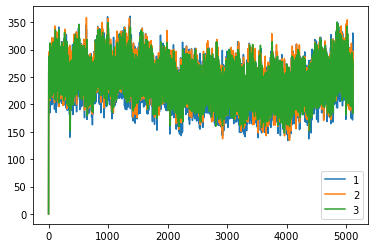

In [70]:
arima1 = ARIMA(Fort, order = (1, 0, 0))
model_fit1 = arima1.fit(disp = False, trend='nc')
print(model_fit1.summary())

arima2 = ARIMA(Fort, order = (3, 0, 0))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())

arima3 = ARIMA(Fort, order = (7, 0, 0))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())

plt.plot(model_fit1.fittedvalues, label='1')
plt.plot(model_fit2.fittedvalues, label='2')
plt.plot(model_fit3.fittedvalues, label='3')
plt.legend()
plt.show()

### С увеличением параметра order происходит уменьшение параметра BIC (но требуется больше системных ресурсов).

In [33]:
arimaz = ARIMA(Fort, order = (12, 0, 0)) 
model_fit = arimaz.fit(disp = False) # подгоняем под ВР
print(model_fit.summary())

C:\Users\dusta\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 5113
Model:                    ARMA(12, 0)   Log Likelihood              -23409.994
Method:                       css-mle   S.D. of innovations             23.548
Date:                Mon, 30 May 2022   AIC                          46847.989
Time:                        17:51:03   BIC                          46939.542
Sample:                             0   HQIC                         46880.040
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        250.8424      2.547     98.495      0.000     245.851     255.834
ar.L1.y        0.2655      0.014     19.007      0.000       0.238       0.293
ar.L2.y       -0.0767      0.014     -5.309      0.0

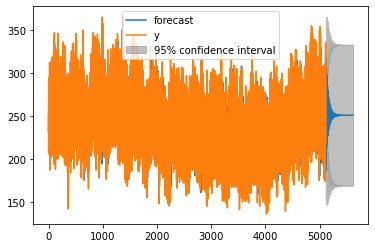

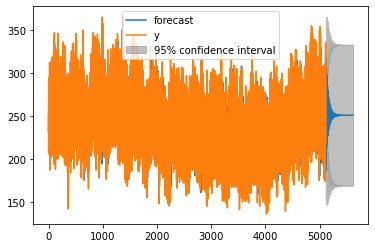

In [71]:
model_fit.plot_predict(0, len(Fort)+pr)

### Модель ARIMA считаем удовлетворительной. Прогноз и доверительный интервал логичны. Временной ряд имеет две периодические составляющие и не является стационарным.

## 9-10. Построим тренд с помощью метода вейвлет-анализа:

In [72]:
wvlt = pywt.Wavelet('db8')
print('Декомпозиция вейвлета до уровня:', pywt.dwt_max_level(len(Fort), wvlt))

Декомпозиция вейвлета до уровня: 8


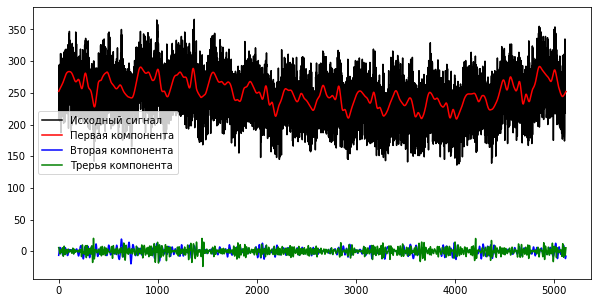

In [73]:
cA5,cD5,cD4,cD3,cD2, cD1 = pywt.wavedec(Fort, wvlt, mode='periodization', level=5)

Fre = pywt.waverec((cA5, None, None, None, None, None), wvlt, mode='periodization')
Fre2 = pywt.waverec((None, cD5, None, None, None, None), wvlt, mode='periodization')
Fre3 = pywt.waverec((None, cD4, None, None, None), wvlt, mode='periodization')

plt.figure(figsize = (10, 5))
plt.plot(t, Fort, 'k', label='Исходный сигнал')
plt.plot(Fre, 'r', label='Первая компонента') 
plt.plot(Fre2, 'b', label='Вторая компонента') 
plt.plot(Fre3, 'g', label='Трерья компонента') 
plt.legend()

plt.show()

Все комбинации узлов, упорядоченные по их частотной ширине спектра:
['aaaa', 'aaad', 'aadd', 'aada', 'adda', 'addd', 'adad', 'adaa', 'ddaa', 'ddad', 'dddd', 'ddda', 'dada', 'dadd', 'daad', 'daaa']


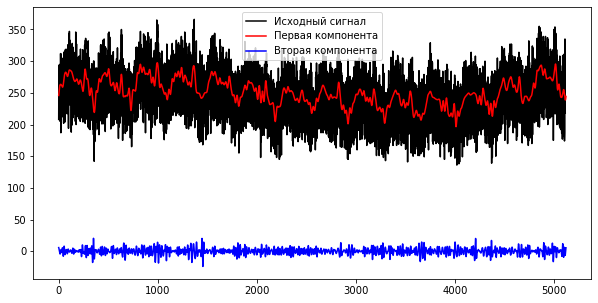

In [74]:
wp = pywt.WaveletPacket(data=Fort, wavelet='db8', mode='periodization')
print('Все комбинации узлов, упорядоченные по их частотной ширине спектра:')
print([node.path for node in wp.get_level(4, 'freq')])

wp = pywt.WaveletPacket(data=Fort, wavelet='db8', mode='periodization')
new_wp = pywt.WaveletPacket(data=None, wavelet='db8', mode='periodization')
new_wp['aaaa'] = wp['aaaa'].data
new_wp.reconstruct(update=True) 
reF1 = new_wp.data
new_wp = pywt.WaveletPacket(data=None, wavelet='db8', mode='periodization')
new_wp['aaad'] = wp['aaad'].data
new_wp.reconstruct(update=True) 
reF2 = new_wp.data 
plt.figure(figsize = (10, 5))
plt.plot(t, Fort, 'k', label='Исходный сигнал')
plt.plot(reF1, 'r', label='Первая компонента') 
plt.plot(reF2, 'b', label='Вторая компонента')
plt.legend()
plt.show()

## 9-10. Построим тренд с помощью метода SSA:

In [75]:
def SSA_modes(F, L):
    N = len(F)
    K = N - L + 1
    X = np.empty((L, K))
    
    i=0
    while i<L:           # Заполнение данной матрицы точками массива
        X[i] = F[i:K+i]
        i+=1
        
    S = np.dot(X, X.T)
    U, A, _ = np.linalg.svd(S)
    V = np.dot(X.T, U)
    
    return A,U,V

In [76]:
def SSA_group(A, U, V, N, I):
    L = len(A)
    K = N - L + 1
    V = V.transpose()
    Z = np.dot(U[:, I], V[I, :])
    G = np.zeros(N)
    L1 = min(L,K)
    K1 = max(L,K)

    for k in range(0, L1-1):
        C=0
        for m in range(0,k+1):
            C = C+Z[m][k-m]
        G[k]=C/(k+1)
        
    for k in range(L1-1, K1):
        C=0
        for m in range(0,L1):
            C = C+Z[m][k-m]
        G[k] = C/L1
        
    for k in range(K1,N):
        C=0
        for m in range(k-K1+1,N-K1+1):
            C = C+Z[m][k-m]
        G[k] = C/(N-k)
    
    return G

In [77]:
A, U, V = SSA_modes(Fort, 100)
F1 = SSA_group(A, U, V, len(Fort), [0, 1, 2,3,4,5,6])
print(F1)

[224.96289134 210.28633117 255.30471701 ... 207.71912218 197.79727346
 249.80281124]


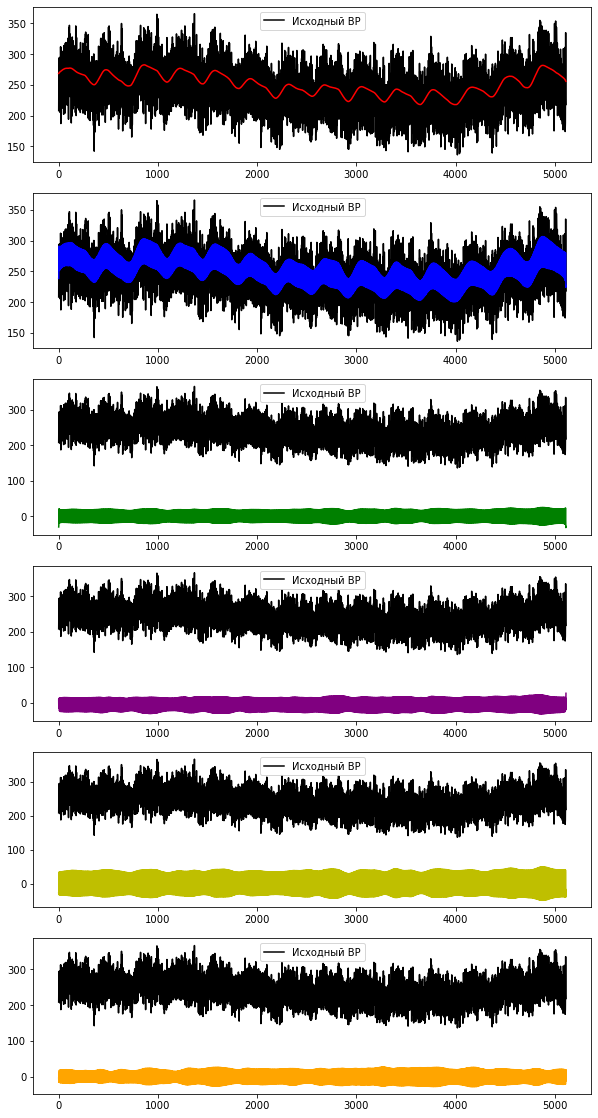

In [78]:
plt.figure(figsize = (10, 20))

F1_0 = SSA_group(A, U, V, len(Fort), [0])
plt.subplot(6,1,1)
plt.plot(Fort, 'k', label='Исходный ВР')
plt.plot(F1_0, 'r')
plt.legend()
 
F1_1 = SSA_group(A, U, V, len(Fort), [0,1])
plt.subplot(6,1,2)
plt.plot(Fort, 'k', label='Исходный ВР')
plt.plot(F1_1, 'b')
plt.legend()
 
F1_2 = SSA_group(A, U, V, len(Fort), [1])
plt.subplot(6,1,3)
plt.plot(Fort, 'k', label='Исходный ВР')
plt.plot(F1_2, 'g')
plt.legend()

F1_01 = SSA_group(A, U, V, len(Fort), [2,3])
plt.subplot(6,1,4)
plt.plot(Fort, 'k', label='Исходный ВР')
plt.plot(F1_01, 'purple')
plt.legend()

F1_02 = SSA_group(A, U, V, len(Fort), [1,2])
plt.subplot(6,1,5)
plt.plot(Fort, 'k', label='Исходный ВР')
plt.plot(F1_02, 'y')
plt.legend()

F1_12 = SSA_group(A, U, V, len(Fort), [3,4])
plt.subplot(6,1,6)
plt.plot(Fort, 'k', label='Исходный ВР')
plt.plot(F1_12, 'orange')
plt.legend()

plt.show()

### Ввиду большого количества точек на графике, данные получились не очень удобно читаемыми, но будем считать, что [0] - тренд временного ряда, [1,2] и [3,4]- периодические составляющие временного ряда.

## 11. Постройте прогноз ряда с помощью рекурсивного метода Сингулярного Спектрального Анализа SSA-R.

In [79]:
def SSA_R(F, L, I, M):
    N = len(F)
    A, U, V = SSA_modes(F, L)
    G = SSA_group(A, U, V, N, I)
    
    Q = np.zeros(N + M) # Увеличиваем матрицу Q на M прогнозируемых точек
    
    vu = np.linalg.norm(U[-1, I])
    R = np.sum(U[L - 1, I] * U[0:L - 1, I], 1)
    R = R / (1 - vu * vu)
    
    for i in range(0, N):
        Q[i] = G[i]
        
    for i in range(N, N + M - 1):
        A=0
        for j in range(0, L-2):
            A += R[j]*Q[i-j-1] 
        Q[i] = A                   
    
    return Q

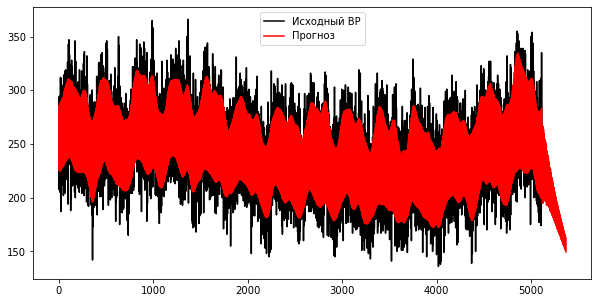

In [80]:
L = 50 # величина окна
M = 256 # количество прогнозируемых точек

Q = SSA_R(Fort, L, [0,1,2,3], M) # прогноз методом SSA-R

plt.figure(figsize = (10, 5))
plt.plot(Fort,'k',label='Исходный ВР')
plt.plot(Q[:len(Q)-1], 'r',label='Прогноз')
plt.legend()
plt.show()

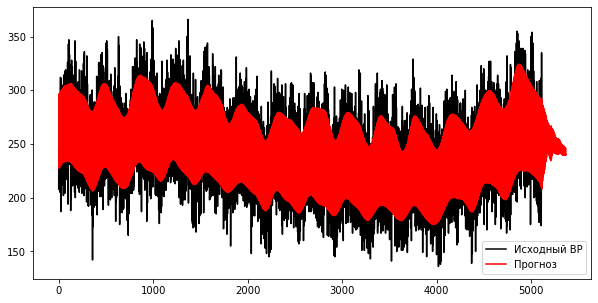

In [86]:
L = 100 # величина окна
M = 256 # количество прогнозируемых точек

Q = SSA_R(Fort, L, [0,1,2,3], M) # прогноз методом SSA-R

plt.figure(figsize = (10, 5))
plt.plot(Fort,'k',label='Исходный ВР')
plt.plot(Q[:len(Q)-1], 'r',label='Прогноз')
plt.legend()
plt.show()

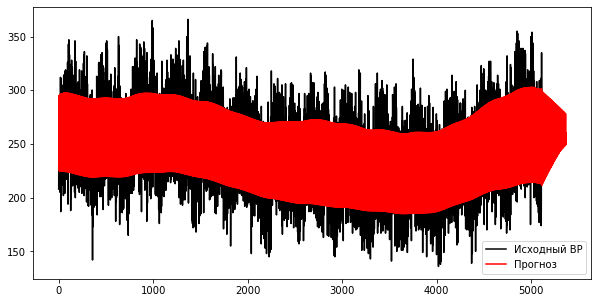

In [87]:
L = 500 # величина окна
M = 256 # количество прогнозируемых точек

Q = SSA_R(Fort, L, [0,1,2,3], M) # прогноз методом SSA-R

plt.figure(figsize = (10, 5))
plt.plot(Fort,'k',label='Исходный ВР')
plt.plot(Q[:len(Q)-1], 'r',label='Прогноз')
plt.legend()
plt.show()

### С увеличением окна прогноз приобретает сглаживающий характер

## 12. Постройте прогноз данных с помощью нейронной сети LSTM.

In [82]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense      
from keras.layers import LSTM      
from keras.layers import Dropout
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.utils.vis_utils import plot_model

In [83]:
def NEIRO_NET(F, PR_T,PR_past,neir,pogr,epo):
    F_ras = np.array(F) # переводим исходный массив F в расчетный массив F_ras
    F_ras = F_ras.reshape(-1, 1) # делаем из одномерного масства двумерный

    scaler = MinMaxScaler(feature_range=(0, 1)) # подгоняет под масштаб по оси OY от 0 до 1
    F_ras = scaler.fit_transform(F_ras) # так как функция активации слоя LSTM корректно обрабатывает значения только в данном диапазоне
    F_tr = F_ras
    F_test = F_ras[len(F_ras)-PR_T-PR_past:]
    
    plt.figure(figsize = (10, 5))
    plt.plot(F_ras, 'k')
    plt.plot(np.r_[:len(F_ras)],F_tr, 'b')
    plt.plot(np.r_[len(F_ras)-PR_T-PR_past:len(F_ras)],F_test, 'r')
    plt.show()

    data_gen = TimeseriesGenerator(F_tr, F_tr, length=PR_past, sampling_rate=1, batch_size=len(F_ras))
    batch_0 = data_gen[0]
    x, y = batch_0 # вход и обучающий выход для сети
    print(x.shape) 
    xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
    yy=y
    print(xx.shape) # меняем местами размерности
    print(yy.shape) 
    
    model = Sequential() # слои соединены последовательно
    model.add(LSTM(units=neir, input_shape=(1, PR_past))) 
    model.add(Dense(units = 1)) # выход одномерный
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    model = Sequential()
    model.add(LSTM(units=neir, return_sequences=True, input_shape=(1, PR_past)))
    model.add(Dropout(pogr))
    model.add(LSTM(units=neir, return_sequences=True))
    model.add(Dropout(pogr))
    model.add(LSTM(units=neir))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    model.fit(xx, yy, epochs = epo)

    data_gen = TimeseriesGenerator(F_test, F_test, length=PR_past, sampling_rate=1,batch_size=len(F_ras)-PR_T)
    batch_0 = data_gen[0]
    x, y = batch_0
    xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
    yy = y
    print(xx.shape) 
    print(yy.shape) 
    
    return model,xx, scaler

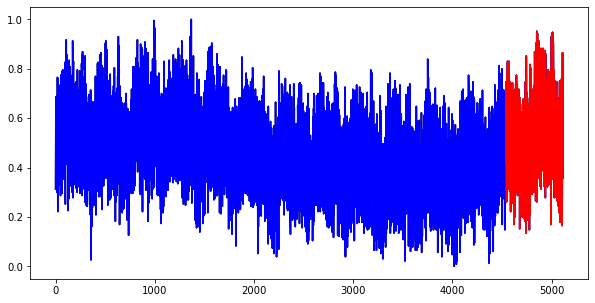

(5049, 64, 1)
(5049, 1, 64)
(5049, 1)
Epoch 1/100
158/158 [==============================] - 15s 13ms/step - loss: 0.0411
Epoch 2/100
158/158 [==============================] - 2s 12ms/step - loss: 0.0095
Epoch 3/100
158/158 [==============================] - 2s 11ms/step - loss: 0.0089
Epoch 4/100
158/158 [==============================] - 2s 13ms/step - loss: 0.0088
Epoch 5/100
158/158 [==============================] - 2s 12ms/step - loss: 0.0088
Epoch 6/100
158/158 [==============================] - 2s 12ms/step - loss: 0.0087
Epoch 7/100
158/158 [==============================] - 2s 12ms/step - loss: 0.0085
Epoch 8/100
158/158 [==============================] - 2s 12ms/step - loss: 0.0084
Epoch 9/100
158/158 [==============================] - 2s 12ms/step - loss: 0.0084
Epoch 10/100
158/158 [==============================] - 2s 12ms/step - loss: 0.0083
Epoch 11/100
158/158 [==============================] - 2s 11ms/step - loss: 0.0082
Epoch 12/100
158/158 [========================

158/158 [==============================] - 2s 12ms/step - loss: 0.0077
Epoch 99/100
158/158 [==============================] - 2s 11ms/step - loss: 0.0076
Epoch 100/100
158/158 [==============================] - 2s 11ms/step - loss: 0.0076
(512, 1, 64)
(512, 1)


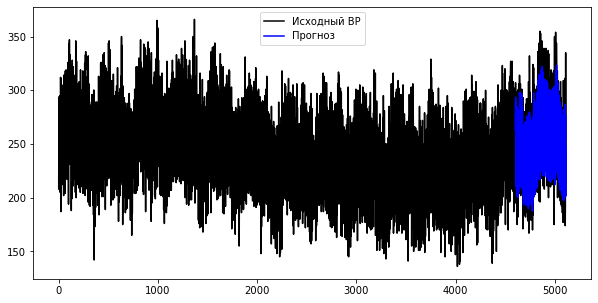

In [84]:
PR_T = 512 # Количество прогнозируемых точек
PR_past = 64 #  по скольким предыдущим точкам проводим обучение
neir = 50 # Количество нейронов в цепочке
pogr=0.01 # Допустимое отклонение 
epo = 100 # Количество эпох

model,xx, scaler = NEIRO_NET(Fort, PR_T ,PR_past, neir, pogr, epo)

testPredict = model.predict(xx)
testPredict = scaler.inverse_transform(testPredict)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k',label='Исходный ВР')
plt.plot(np.r_[len(Fort)-PR_T:len(Fort)],testPredict, 'b',label='Прогноз')
plt.legend()
plt.show()

## Выводы по работе

Все работы выполнены по пунктам и в соответствии с инструментами и методами, использованными в ходе выполнения практических заданий по курсу «Специальные разделы математики» (всего 8 лабораторных работ за весенний семестр 2022 г.).

В ходе выполнения задания был построен ВР, дана его визуальная оценка, вычислены МО, Д, асимметрия ВР и эксцесс ВР, затронуты, наряду с автокорреляционной функцией, спектральные свойства рядов.

Оценена стационарность заданного временного ряда KPSS-тестом и построены периодограмма и спектрограмма. По полученным данным сделаны соответствующие выводы.

Рассчитана регрессионная модель тренда первого порядка, построен получившийся тренд.

В работе представлен прогноз данных с помощью модели ARIMA, на основе которого сделан вывод, что полученную модель можно счесть удовлетворительной. Прогноз и доверительный интервал логичны. Временной ряд имеет две периодические составляющие и не является стационарным.

В процессе работы представлены результаты по использованию вейвлет-инструментария для анализа и декомпозиции временных рядов, а также получения оценки их частотно-временных характеристик (по имеющимся периодическим составляющим рассматриваемого ВР).
Кроме того, рассмотрен метода сингулярного спектрального анализа SSA (МЕТОД SSA – «ГУСЕНИЦА»). Построен прогноз ряда с помощью рекурсивного метода Сингулярного Спектрального Анализа SSA-R.

В завершении рассмотрена реализация LSTM-прогнозной сети на основе фреймворка keras над tensorflow.

По итогам работы дана обобщённая оценка полученным результатам с учётом возможностей популярных python-библиотек.